#**12.3.4 사용자 정의 지표**

손실 
- 모델을 훈련하기 위해 경사 하강법에서 사용하므로 미분 가능해야하고 그레디언트가 모든곳에서 0이 아니어야 함
- 사람이 쉽게 이해할수 없어도 됨

지표 
- 모델을 평가할 때 사용 
- 이해하기 쉬어야함 
- 미분 가능하지 않거나 그래디언트가 0이어도 됨

대부분의 경우 사용자 지표함수를 만드는 것은 사용자 손실함수를 만드는것과 동일 





precision
- 모델이 true라고 분류한 것 중에서 실제 True인 것의 비율
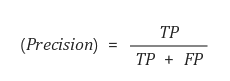

**keras.metrics.Precision**

진짜 양성의 개수와 거짓양성의 개수를 기록하고 필요할때 정밀도를 계산할 수 있는 객체

precision = keras.metrics.Precision()


In [ ]:
def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision

In [ ]:
class HuberMetric(keras.metrics.Metric):
  def __init(self, threshold=1.0 **kwargs):
    super().__init(**kwargs)
    self.threshold = threshold
    self.huber_fn = create_huber(threshold)
    self.total = self.add_weight("totla", initializer="zeros")
    self.count = self.aadd_weight("count", initializer="zeros")
  def update_state(self, y_true, y_pred, sample_weight=None):
    metric = self.huber_fn(y_true, y_pred)
    self.total.assign_add(tf.reduce_sum(metric))
    self.count.assign_add(ft.cast(tf.size(y_true), tf.float32))
  def result(self):
    return self.total / self.count
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, "threshold": self.threshold}

NameError: ignored

# **12.3.5 사용자 정의 층**
텐서플로에는 없는 특이한 층을 가진 네트워크를 만들어야할때 사용자 정의 층을 만듦
keras.layers.Flatten, ReLu같은 층은 가중치가 없음 
가중치 함수를 만든후 람다층으로 감싸서 사용할수있음 

exp_layer = keras.layers.Lambda(lambda x: tf.exp(x))

In [ ]:
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers
from keras import models
import numpy as np
 
class MyDense(Layer):
  def __init__(self, n_units, **kwargs):
    self.n_units = n_units
    super().__init__(**kwargs)
    
  def build(self, inshape): #initialise layer
    self.w = self.add_weight("w", (inshape[1], self.n_units),
                            initializer=initializers.get('glorot_uniform'))
    #add_weithgt 메소드로 가중치 추가 
    self.b = self.add_weight("b", (self.n_units,),
                            initializer=initializers.get('zeros'))
    super().build(inshape)
    
  def call(self, x): #이 층에 필요한 연산 수행후 반환 
    return K.dot(x, self.w) + self.b
  
  def compute_output_shape(self, inshape): #return output size of layer
    return (inshape[0], self.n_units)
  
x = np.array([0, 1, 2, 3, 4])
y = x * 2 + 1
 
model = models.Sequential()
model.add(MyDense(1, input_shape=(1,)))
model.compile('SGD', 'mse')
 
model.fit(x[:2], y[:2], epochs=1000, verbose=0)
print('Target:', y[2:])
print('Predictions:', model.predict(x[2:]).flatten())


Target: [5 7 9]
Predictions: [4.997045 6.994907 8.992769]


훈련과 테스트에서 다르게 동작하는 층이 필요하다면 call()메서드에 training 매개변수를 추가하여 훈련인지 테스트인지 결정해야함 

def call(self,X training=None):
  
  if training:
    
    noise
    return X+noise
  
  else:
  
    return X

케라스에는 keras.layers.GaussianNoise 층이 있음 
